In [217]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

# Generate simulation data

In [35]:
def generate_data(I = 100, k = random.uniform(0, 8)):
    Xi = []
    Yi = []
    ci = []
    ri = []
    for i in range(I):
        ci.append(random.random())
        ri.append(math.exp(random.random()))
        li = ci[-1] - ri[-1]
        mi = ci[-1] + ri[-1]
        Xi.append([li, mi])
        Yi.append([li + k, mi + k])
    ci_dash = [e + k for e in ci]
    return Xi, Yi, ci, ri, ci_dash, k              

In [90]:
Xi, Yi, ci, ri, ci_dash, k = generate_data(k=50)
ri_dash = ri

ci_joined = ci + ci_dash
ri_joined = ri + ri_dash 

In [221]:
def MallowsDistMatrix(ci, ri, scenario="XunifYunif"):
    """
    ci: the centres of the intervals. A concatenation of ci centres of X intervals and ci_dash intervals of Y intervals.
    ri: ranges of the intervals. A concatenation of ri ranges of X intervals and ri_dash ranges of Y intervals.
    scenario: One of "XunifYunif": both X and Y intervals are uniformly distributed.
               "XunifYsym" : X uniform, Y symmetric.
               "XsymYsym"  : both X and Y intervals are symmetric.
    """
    allowed_scenarios = ['XunifYunif', 'XunifYsym', 'XsymYsym']
    assert scenario in allowed_scenarios, "scenario must be one of 'XunifYunif', 'XunifYsym', or 'XsymYsym'"
    size = len(ci)
    D_M = np.empty((size,size))
    for i in range(size):
        c = ci[i]
        for j in range(size):
            c_dash = ci[j]
            if (scenario == allowed_scenarios[0]):
                D_M[i,j] = (ci[i] - ci[j])**2 + 1./3*(ri[i]-ri[j])**2
            elif (scenario == allowed_scenarios[1]):
                D_M[i,j] = (ci[i] - ci[j])**2 - 22./45*ri[i]*ri[j] + 1./3*(ri[i]**2) - (20*math.pi-71.)/45*(ri[j]**2)
            else:
                D_M[i,j] = (ci[i] - ci[j])**2 - (20*math.pi-71.)/45*(ri[i]-ri[j])**2
    return D_M

In [91]:
D_M = MallowsDistMatrix(ci_joined, ri_joined)

## Heirarchical Clustering 

In [198]:
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids

In [92]:
clustering = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single").fit(D_M) 

In [93]:
pred = clustering.labels_

In [42]:
k

3.0847063617453667

In [222]:
# Do everything above for 100 uniform values of k between 0 and 8

def clustering(k=random.uniform(0, 5), scenario="XunifYunif", algorithm="Agglomerative"):
    allowed_algos = ["Agglomerative", "KMedoids"]
    assert algorithm in allowed_algos, "algorithm must be one of Agglomerative or KMedoids."
    Xi, Yi, ci, ri, ci_dash, k = generate_data(k=k)
    ri_dash = ri
    ci_joined = ci + ci_dash
    ri_joined = ri + ri_dash 
    D_M = MallowsDistMatrix(ci_joined, ri_joined, scenario=scenario)
    if algorithm == "Agglomerative":
        clustering = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single").fit(D_M)
    else:
        clustering = KMedoids(n_clusters=2, metric="precomputed").fit(D_M)
    pred = clustering.labels_
    return (np.size(np.where(pred[:100] == pred[0])) + np.size(np.where(pred[100:] != pred[0])))/200.
    
def clustering_sim(K, scenario="XunifYunif", rep=10, algorithm="Agglomerative"):
    correct_k = []
    for k in K:        
        correct = []
        for r in range(rep):
            correct.append(clustering(k, scenario=scenario, algorithm=algorithm))
        correct_k.append(np.mean(correct))
    return correct_k

In [206]:
clustering(0.4, algorithm="KMedoids")

0.675

In [230]:
K = np.linspace(0.5, 2, 100, endpoint=True)
correct_k_XunifYunif = clustering_sim(K, scenario="XunifYunif")
correct_k_XunifYsym = clustering_sim(K, scenario="XunifYsym")
correct_k_XsymYsym = clustering_sim(K, scenario="XsymYsym")

Text(0, 0.5, 'Proportion of correctly clustered observations')

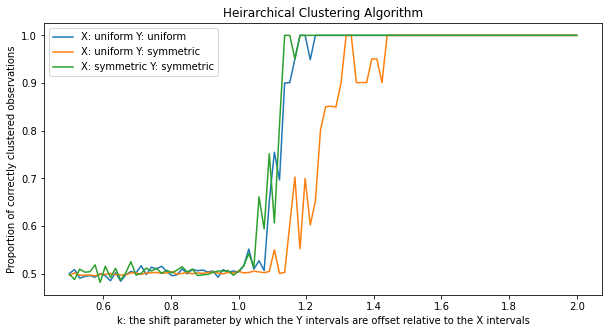

In [231]:
plt.plot(K, correct_k_XunifYunif, label="X: uniform Y: uniform")
plt.plot(K, correct_k_XunifYsym, label="X: uniform Y: symmetric")
plt.plot(K, correct_k_XsymYsym, label="X: symmetric Y: symmetric")
plt.legend()
plt.title("Heirarchical Clustering Algorithm")
plt.xlabel("k: the shift parameter by which the Y intervals are offset relative to the X intervals")
plt.ylabel("Proportion of correctly clustered observations")

## KMedoids Clustering

In [225]:
K = np.linspace(0.5, 2, 100, endpoint=True)
correct_k_XunifYunif = clustering_sim(K, scenario="XunifYunif", algorithm="KMedoids")
correct_k_XunifYsym = clustering_sim(K, scenario="XunifYsym", algorithm="KMedoids")
correct_k_XsymYsym = clustering_sim(K, scenario="XsymYsym", algorithm="KMedoids")

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:247: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:247: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:247: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:247: ConvergenceWarning: Maximum number of iteration reached before 

Text(0, 0.5, 'Proportion of correctly clustered observations')

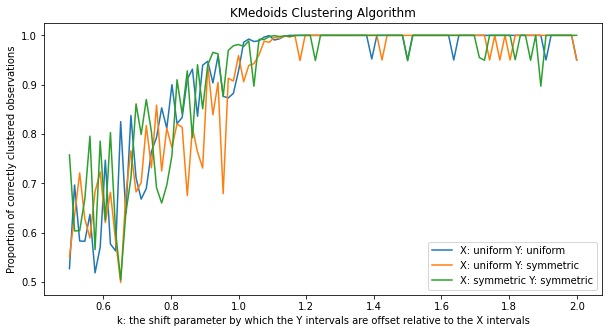

In [229]:
plt.plot(K, correct_k_XunifYunif, label="X: uniform Y: uniform")
plt.plot(K, correct_k_XunifYsym, label="X: uniform Y: symmetric")
plt.plot(K, correct_k_XsymYsym, label="X: symmetric Y: symmetric")
plt.legend()
plt.title("KMedoids Clustering Algorithm")
plt.xlabel("k: the shift parameter by which the Y intervals are offset relative to the X intervals")
plt.ylabel("Proportion of correctly clustered observations")